In [60]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import sklearn
%matplotlib inline
pd.options.display.float_format = '{:.1f}'.format

# Suppress annoying harmless error.
import warnings
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

#plotly
import plotly.plotly as py
from plotly.graph_objs import *
import plotly
import plotly.tools as tls
import plotly.graph_objs as go
import plotly.figure_factory as ff
from  plotly  import __version__
#plotly offline
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
print(__version__) # requires version >= 1.9.0
init_notebook_mode(connected=True)

3.1.0


In [2]:
df = pd.read_excel('/Users/tiffanyfrench/Desktop/fbi_ny_14.xlsx')

In [3]:
df.dtypes

City                                       object
Population                                  int64
Violent\ncrime                              int64
Murder and\nnonnegligent\nmanslaughter      int64
Rape\n(revised\ndefinition)1              float64
Rape\n(legacy\ndefinition)2               float64
Robbery                                     int64
Aggravated\nassault                         int64
Property\ncrime                           float64
Burglary                                    int64
Larceny-\ntheft                           float64
Motor\nvehicle\ntheft                       int64
Arson3                                    float64
dtype: object

In [4]:
df=df.rename(columns = {'Violent\ncrime':'violent_crime'})

In [5]:
df=df.rename(columns = {'City':'city'})

In [6]:
df=df.rename(columns = {'Murder and\nnonnegligent\nmanslaughter':'murder_manslaughter'})

In [7]:
df=df.rename(columns = {'Rape\n(revised\ndefinition)1':'rape'})

In [8]:
df=df.rename(columns = {'Robbery':'robbery'})

In [9]:
df=df.rename(columns = {'Aggravated\nassault':'agg_assault'})

In [10]:
df=df.rename(columns = {'Property\ncrime':'prop_crime'})

In [11]:
df=df.rename(columns = {'Burglary':'burglary'})

In [12]:
df=df.rename(columns = {'Larceny-\ntheft':'larceny'})

In [13]:
df=df.rename(columns = {'Motor\nvehicle\ntheft':'mv_theft'})

In [14]:
df=df.rename(columns = {'Arson3':'arson'})

In [15]:
df=df.rename(columns = {'Rape\n(legacy\ndefinition)2':'rape_2'})

In [16]:
df=df.rename(columns = {'Population':'population'})

In [17]:
df.rape = df['rape'].fillna(df['rape_2'])

In [18]:
df = df.drop('rape_2', 1)

In [19]:
df

,city,population,violent_crime,murder_manslaughter,rape,robbery,agg_assault,prop_crime,burglary,larceny,mv_theft,arson
0,Adams Village,1851,0,0,0.0,0,0,11.0,1,10.0,0,0.0
1,Addison Town and Village,2568,2,0,0.0,1,1,49.0,1,47.0,1,0.0
2,Afton Village4,820,0,0,0.0,0,0,1.0,0,1.0,0,0.0
3,Akron Village,2842,1,0,0.0,0,1,17.0,0,17.0,0,0.0
4,Albany4,98595,802,8,54.0,237,503,3888.0,683,3083.0,122,12.0
5,Albion Village4,5872,26,0,3.0,2,21,204.0,41,159.0,4,0.0
6,Alexandria Bay Village4,1107,0,0,0.0,0,0,7.0,2,5.0,0,0.0
7,Alfred Village4,4032,11,1,1.0,0,9,30.0,6,24.0,0,0.0
8,Altamont Village4,1723,1,0,0.0,0,1,2.0,2,0.0,0,0.0
9,Amherst Town4,118860,128,1,16.0,43,68,2066.0,176,1846.0,44,2.0


In [20]:
df.drop([364])

,city,population,violent_crime,murder_manslaughter,rape,robbery,agg_assault,prop_crime,burglary,larceny,mv_theft,arson
0,Adams Village,1851,0,0,0.0,0,0,11.0,1,10.0,0,0.0
1,Addison Town and Village,2568,2,0,0.0,1,1,49.0,1,47.0,1,0.0
2,Afton Village4,820,0,0,0.0,0,0,1.0,0,1.0,0,0.0
3,Akron Village,2842,1,0,0.0,0,1,17.0,0,17.0,0,0.0
4,Albany4,98595,802,8,54.0,237,503,3888.0,683,3083.0,122,12.0
5,Albion Village4,5872,26,0,3.0,2,21,204.0,41,159.0,4,0.0
6,Alexandria Bay Village4,1107,0,0,0.0,0,0,7.0,2,5.0,0,0.0
7,Alfred Village4,4032,11,1,1.0,0,9,30.0,6,24.0,0,0.0
8,Altamont Village4,1723,1,0,0.0,0,1,2.0,2,0.0,0,0.0
9,Amherst Town4,118860,128,1,16.0,43,68,2066.0,176,1846.0,44,2.0


In [21]:
df.dtypes

city                    object
population               int64
violent_crime            int64
murder_manslaughter      int64
rape                   float64
robbery                  int64
agg_assault              int64
prop_crime             float64
burglary                 int64
larceny                float64
mv_theft                 int64
arson                  float64
dtype: object

In [22]:
df['rape'] = pd.to_numeric(df.rape, errors='coerce')

In [23]:
df['prop_crime'] = pd.to_numeric(df.prop_crime, errors='coerce')

In [24]:
df['larceny'] = pd.to_numeric(df.larceny, errors='coerce')

In [25]:
df['arson'] = pd.to_numeric(df.arson, errors='coerce')

In [26]:
df.dtypes

city                    object
population               int64
violent_crime            int64
murder_manslaughter      int64
rape                   float64
robbery                  int64
agg_assault              int64
prop_crime             float64
burglary                 int64
larceny                float64
mv_theft                 int64
arson                  float64
dtype: object

In [27]:
df.rape = df.rape.astype(int)

In [28]:
count_nan = len(df.prop_crime) - df.prop_crime.count()
print(count_nan)

1


In [29]:
X = pd.DataFrame(df['population'])
X

,population
0,1851
1,2568
2,820
3,2842
4,98595
5,5872
6,1107
7,4032
8,1723
9,118860


In [30]:
X['pop_square'] = df.population ** 2

In [31]:
X['murder_rate'] = np.where(df['murder_manslaughter']> 0, 1, 0)

In [32]:
X['robbery_rate'] = np.where(df['robbery']> 0, 1, 0)
X.head(5)

,population,pop_square,murder_rate,robbery_rate
0,1851,3426201,0,0
1,2568,6594624,0,1
2,820,672400,0,0
3,2842,8076964,0,0
4,98595,9720974025,1,1


In [41]:
X['property_crime'] = df.prop_crime

In [42]:
X

,population,pop_square,murder_rate,robbery_rate,property_crime
0,1851,3426201,0,0,11.0
1,2568,6594624,0,1,49.0
2,820,672400,0,0,1.0
3,2842,8076964,0,0,17.0
4,98595,9720974025,1,1,3888.0
5,5872,34480384,0,1,204.0
6,1107,1225449,0,0,7.0
7,4032,16257024,1,0,30.0
8,1723,2968729,0,0,2.0
9,118860,14127699600,1,1,2066.0


In [48]:
X.fillna(0, inplace=True)

In [49]:
X

,population,pop_square,murder_rate,robbery_rate,property_crime
0,1851,3426201,0,0,11.0
1,2568,6594624,0,1,49.0
2,820,672400,0,0,1.0
3,2842,8076964,0,0,17.0
4,98595,9720974025,1,1,3888.0
5,5872,34480384,0,1,204.0
6,1107,1225449,0,0,7.0
7,4032,16257024,1,0,30.0
8,1723,2968729,0,0,2.0
9,118860,14127699600,1,1,2066.0


In [50]:
y = X.property_crime

In [51]:
print(X.shape)
missing_values_count = X.isnull().sum()
print(missing_values_count)

(369, 5)
population        0
pop_square        0
murder_rate       0
robbery_rate      0
property_crime    0
dtype: int64


In [52]:
# how many total missing values do we have?
total_cells = np.product(X.shape)
total_missing = missing_values_count.sum()

# percent of data that is missing
(total_missing/total_cells) * 100

0.0

In [55]:
import numpy as np
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X, y)
reg.score(X, y)
reg.intercept_ 
#reg.predict(np.array([[3, 5]]))

-3.524291969370097e-12

In [56]:
#regression coefficient
reg.coef_

array([ 8.45566767e-17, -4.13590306e-24,  7.29058223e-13,  1.40898149e-12,
        1.00000000e+00])

In [58]:
#yhat
np.matmul(X, reg.coef_)

array([1.10000000e+01, 4.90000000e+01, 1.00000000e+00, 1.70000000e+01,
       3.88800000e+03, 2.04000000e+02, 7.00000000e+00, 3.00000000e+01,
       2.00000000e+00, 2.06600000e+03, 1.90231585e-13, 1.98000000e+02,
       4.90000000e+02, 6.00000000e+00, 2.50000000e+01, 2.50000000e+01,
       6.00000000e+00, 1.20000000e+01, 1.40000000e+01, 6.50000000e+01,
       7.30000000e+01, 5.99000000e+02, 1.48000000e+02, 2.45000000e+02,
       1.23000000e+02, 4.54000000e+02, 2.04800000e+03, 3.00000000e+00,
       8.60000000e+01, 9.00000000e+00, 1.00000000e+01, 2.10000000e+01,
       9.00000000e+00, 1.70000000e+01, 8.54000000e+02, 1.28000000e+02,
       2.50000000e+01, 5.00000000e+00, 1.24490000e+04, 5.50000000e+01,
       3.20000000e+01, 3.50000000e+01, 4.70000000e+02, 1.20000000e+01,
       3.01000000e+02, 7.50000000e+01, 9.00000000e+00, 3.30000000e+01,
       2.06000000e+02, 4.00000000e+00, 6.20000000e+01, 2.00000000e+00,
       3.80000000e+01, 4.10000000e+01, 4.00000000e+01, 2.00000000e+00,
      

In [61]:
sklearn.linear_model.LinearRegression(fit_intercept=True, normalize=False, copy_X=True, n_jobs=None)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [66]:
bnb = sklearn.linear_model.LinearRegression(fit_intercept=True, normalize=False, copy_X=True, n_jobs=None)
# Test your model with different holdout groups.
data = X
target = y

from sklearn.model_selection import train_test_split
# Use train_test_split to create the necessary training and test groups
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=20)
print('With 20% Holdout: ' + str(bnb.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(bnb.fit(data, target).score(data, target)))

With 20% Holdout: 1.0
Testing on Sample: 1.0


In [67]:
type(bnb)

sklearn.linear_model.base.LinearRegression

In [68]:
bnb.predict

<bound method LinearModel.predict of LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)>

In [70]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)


(295, 5) (295,)
(74, 5) (74,)


In [71]:
# fit a model
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

In [72]:
predictions[0:5]

array([-1.07483378e-12,  6.02000000e+02,  3.30000000e+01,  6.10000000e+01,
        3.60000000e+01])

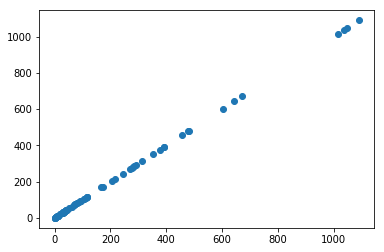

In [75]:
plt.scatter(y_test, predictions)
#plt.xlabel(“True_Values”)
#plt.ylabel(“Predictions”)

In [78]:
model.score(X_test, y_test)

1.0

In [95]:
from sklearn.model_selection import LeaveOneOut
X = np.array([[1, 2], [3, 4]])
y = np.array([1, 2])
loo = LeaveOneOut()
loo.get_n_splits(X)
2
print(loo)
LeaveOneOut()
for train_index, test_index in loo.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    print(X_train, X_test, y_train, y_test)

LeaveOneOut()
TRAIN: [1] TEST: [0]
[[3 4]] [[1 2]] [2] [1]
TRAIN: [0] TEST: [1]
[[1 2]] [[3 4]] [1] [2]
